<h1>Step Size Analysis

<h4>Imports

In [1]:
# IMPORTS

import numpy as np
import numpy.linalg as npla
import pandas as pd

import math as m
import statistics as stat

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import seaborn as sns
sns.set_theme()

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<h4>Functions

In [2]:
def norm_error(data,base):
    return abs((npla.norm(data)-npla.norm(base))/npla.norm(base))

def max_error(data,base):
    return np.abs((np.max(data)-np.max(base))/np.max(base))

def rel_error(data,base):
    error = 0
    for approx,exact in zip(data,base):
        error += abs((approx-exact)/exact)
    return error


<h4>Data

In [3]:
steps = [1000,900,800,700,675,650,625,600,575,550,525,500,475,450,425,400,375,350,325,300]

In [4]:
memory = {
        300: 3.660972,
        325: 2.454192,
        350: 1.749033 ,
        375: 1.320604,
        400: 0.9900340,
        425: 0.7645350,
        450: 0.6619310 ,
        475: 0.5082030,
        500: 0.3415850,
        525: 0.3417780,
        550: 0.2842830,
        575: 0.2329610,
        600: 0.1920660,
        625: 0.1404050,
        650: 0.1448150,
        675: 0.1212570,
        700: 0.1125160,
        750: 0.083972000,
        800: 0.061193001,
        850: 0.048287001,
        900: 0.041439999,
        1000:0.021988999
        }


sy_time ={
        300: 1.228132,
        325: 0.857035,
        350: 0000,
        375: 0000,
        400: 0000,
        425: 0000,
        450: 0000,
        475: 0000,
        500: 0000,
        525: 0000,
        550: 0000,
        575: 0000,
        600: 0000,
        625: 0000,
        650: 0000,
        675: 0000,
        700: 0000,
        750: 0000,
        800: 0000,
        900: 0000,
        1000: 000,
        }

nu_time = {
        300: 25.908834,
        325: 17.517611,
        350: 12.726023,
        375: 6.224243,
        400: 3.717857,
        425: 4.106344,
        450: 1.461399,
        475: 1.027425,
        500: 0.594325,
        525: 0.591596,
        550: 0.571520,
        575: 0.382967,
        600: 0.275942,
        625: 0.193487,
        650: 0.184758,
        675: 0.161733,
        700: 0.158713,
        750: 0.132030,
        800: 0.079357,
        900: 0.052004,
        1000: 0.031831,
        }

solve_time = {
        300: 0.610823,
        325: 0.378007,
        350: 0.699761,
        375: 0.145039,
        400: 0.112432,
        425: 0.184725,
        450: 0.070305,
        475: 0.039351,
        500: 0.026413,
        525: 0.028549,
        550: 0.032289,
        575: 0.015582,
        600: 0.017660,
        625: 0.012055,
        650: 0.011585,
        675: 0.010023,
        700: 0.009628,
        750: 0.005753,
        800: 0.006495,
        900: 0.003246,
        1000: 0.001421,
        }

In [5]:
steps.sort(reverse=True)
Nx = 200; Ny = 200

tot_data = {}

field_base = '/out/lp_field_0.bin'
field_dt_type = np.dtype([('i', np.int64), ('j', np.int64), ('field', np.float64), ('emit',np.int64)])
for step in steps:
    tot_data[step] = np.zeros((Nx,Ny))
    filename = f'h{step}{field_base}'
    data_mem = np.memmap(filename, dtype=field_dt_type, mode='r', order='F')
    data = pd.DataFrame.from_records(data=data_mem, columns=data_mem.dtype.names)

    for k in range(Nx*Ny):
        i = data['i'][k]
        j = data['j'][k]

        tot_data[step][i][j] = data['field'][k]
    tot_data[step] = tot_data[step].flatten()

<h4>Error Analysis

Error slope: 3.1426790859539033
Memory slope: -4.103674306371406
LU slope: -5.821984463257228
Solve slope: -5.0006307865489585


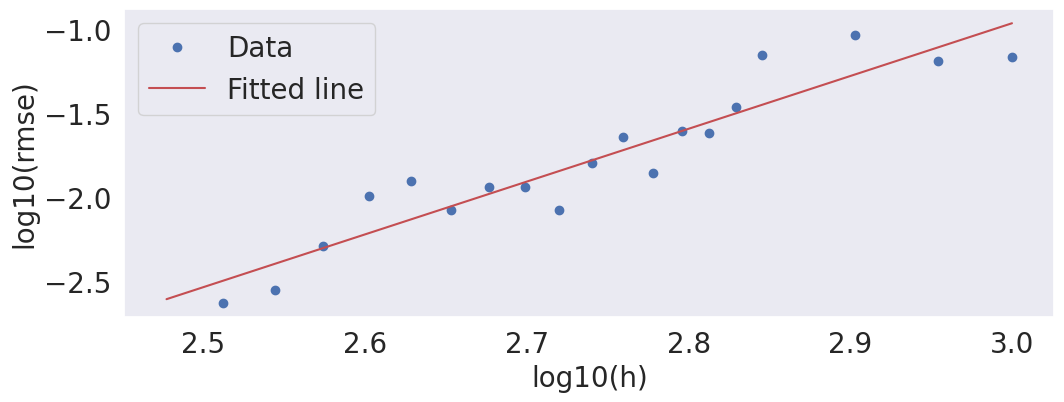

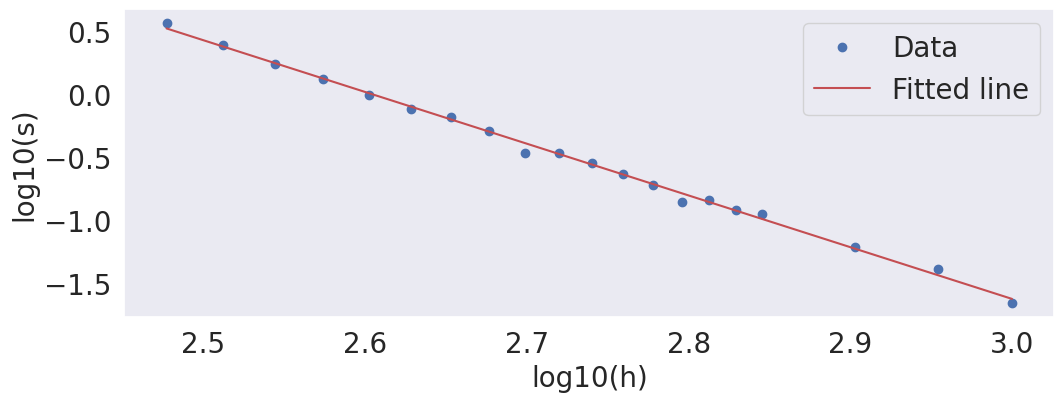

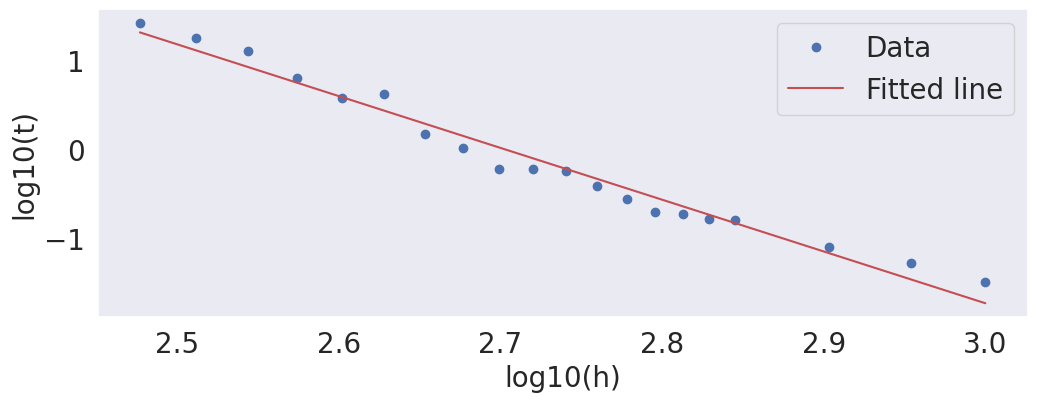

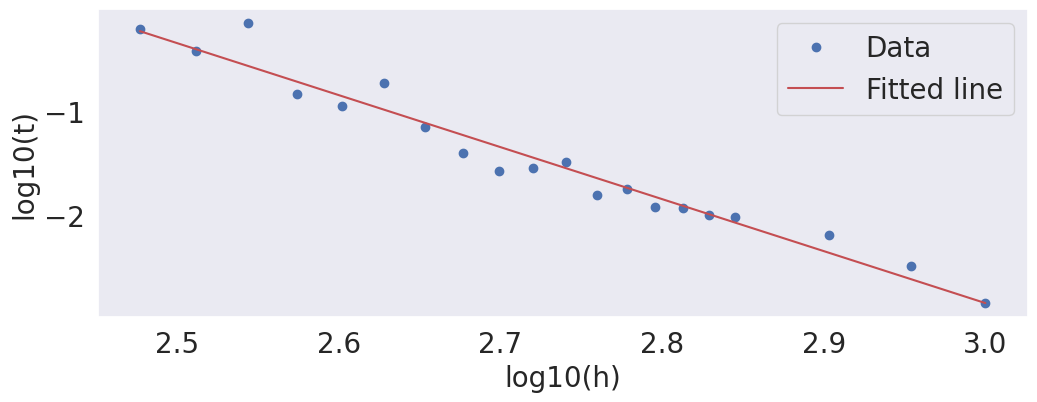

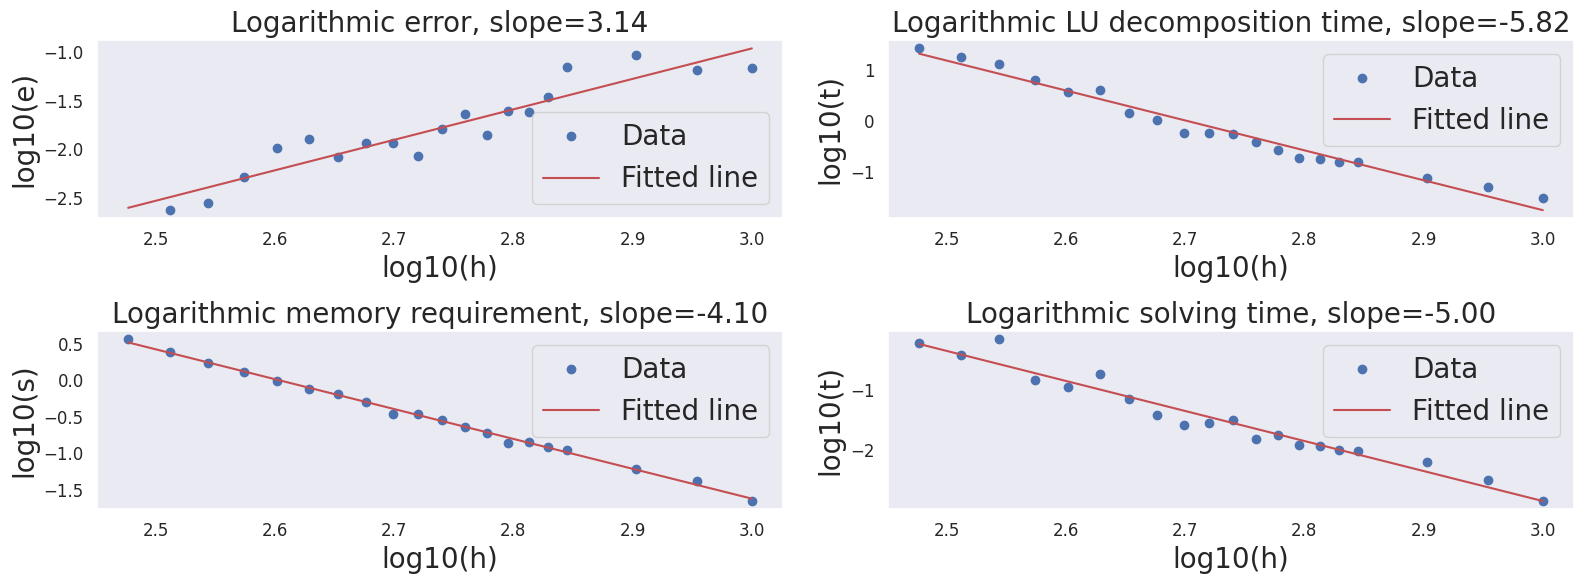

Best memory: 3.660972
Best LU time: 25.908834
Best solve time: 0.610823


In [10]:
error_data = []
memory_data = []
lu_data = []
solve_data = []


for step in steps:
    error_data.append(norm_error(tot_data[step],tot_data[steps[-1]]))
    memory_data.append(memory[step])
    lu_data.append(nu_time[step])
    solve_data.append(solve_time[step])

# Logarithmic analysis
log_steps = np.array([np.log10(s) for s in steps])

log_error = np.array([np.log10(e) for e in error_data[:-1]])
error_slope, error_intercept = np.polyfit(log_steps[:-1], log_error, 1)

log_mem = np.array([np.log10(m) for m in memory_data])
mem_slope, mem_intercept = np.polyfit(log_steps, log_mem, 1)

log_lu = np.array([np.log10(l) for l in lu_data])
lu_slope, lu_intercept = np.polyfit(log_steps, log_lu, 1)

log_solve = np.array([np.log10(s) for s in solve_data])
solve_slope, solve_intercept = np.polyfit(log_steps, log_solve, 1)

print('Error slope:', error_slope)
print('Memory slope:', mem_slope)
print('LU slope:', lu_slope)
print('Solve slope:', solve_slope)

fonts = 20

size = (12,4)
# Error
fig = plt.figure(figsize=size)
plt.plot(log_steps[:-1], log_error, 'o', label='Data')
plt.plot(log_steps, error_slope*log_steps + error_intercept, 'r', label='Fitted line')
plt.xlabel('log10(h)', fontsize=fonts)
plt.ylabel('log10(rmse)', fontsize=fonts)
plt.tick_params(axis='both', which='major', labelsize=fonts)
plt.grid()
plt.legend(fontsize=fonts)
plt.tight_layout
plt.show()

# Memory
fig = plt.figure(figsize=size)
plt.plot(log_steps, log_mem, 'o', label='Data')
plt.plot(log_steps, mem_slope*log_steps + mem_intercept, 'r', label='Fitted line')
plt.xlabel('log10(h)', fontsize=fonts)
plt.ylabel('log10(s)', fontsize=fonts)
plt.tick_params(axis='both', which='major', labelsize=fonts)
plt.grid()
plt.legend(fontsize=fonts)
plt.tight_layout
plt.show()

# LU decomposition time
fig = plt.figure(figsize=size)
plt.plot(log_steps, log_lu, 'o', label='Data')
plt.plot(log_steps, lu_slope*log_steps + lu_intercept, 'r', label='Fitted line')
plt.xlabel('log10(h)', fontsize=fonts)
plt.ylabel('log10(t)', fontsize=fonts)
plt.tick_params(axis='both', which='major', labelsize=fonts)
plt.grid()
plt.legend(fontsize=fonts)
plt.tight_layout
plt.show()

# Solving time
fig = plt.figure(figsize=size)
plt.plot(log_steps, log_solve, 'o', label='Data')
plt.plot(log_steps, solve_slope*log_steps + solve_intercept, 'r', label='Fitted line')
plt.xlabel('log10(h)', fontsize=fonts)
plt.ylabel('log10(t)', fontsize=fonts)
plt.tick_params(axis='both', which='major', labelsize=fonts)
plt.grid()
plt.legend(fontsize=fonts)
plt.tight_layout
plt.show()

# Subplots
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(222)
ax4 = fig.add_subplot(224)

ax1.set_title(f'Logarithmic error, slope={error_slope:.2f}', fontsize=fonts)
ax1.plot(log_steps[:-1], log_error, 'o', label='Data')
ax1.plot(log_steps, error_slope*log_steps + error_intercept, 'r', label='Fitted line')
ax1.set_xlabel('log10(h)', fontsize=fonts)
ax1.set_ylabel('log10(e)', fontsize=fonts)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.grid()
ax1.legend(fontsize=fonts)

ax2.set_title(f'Logarithmic memory requirement, slope={mem_slope:.2f}', fontsize=fonts)
ax2.plot(log_steps, log_mem, 'o', label='Data')
ax2.plot(log_steps, mem_slope*log_steps + mem_intercept, 'r', label='Fitted line')
ax2.set_xlabel('log10(h)', fontsize=fonts)
ax2.set_ylabel('log10(s)', fontsize=fonts)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.grid()
ax2.legend(fontsize=fonts)

ax3.set_title(f'Logarithmic LU decomposition time, slope={lu_slope:.2f}', fontsize=fonts)
ax3.plot(log_steps, log_lu, 'o', label='Data')
ax3.plot(log_steps, lu_slope*log_steps + lu_intercept, 'r', label='Fitted line')
ax3.set_xlabel('log10(h)', fontsize=fonts)
ax3.set_ylabel('log10(t)', fontsize=fonts)
ax3.tick_params(axis='both', which='major', labelsize=12)
ax3.grid()
ax3.legend(fontsize=fonts)

ax4.set_title(f'Logarithmic solving time, slope={solve_slope:.2f}', fontsize=fonts)
ax4.plot(log_steps, log_solve, 'o', label='Data')
ax4.plot(log_steps, solve_slope*log_steps + solve_intercept, 'r', label='Fitted line')
ax4.set_xlabel('log10(h)', fontsize=fonts)
ax4.set_ylabel('log10(t)', fontsize=fonts)
ax4.tick_params(axis='both', which='major', labelsize=12)
ax4.grid()
ax4.legend(fontsize=fonts)

plt.tight_layout()
plt.show()

print('Best memory:', memory_data[-1])
print('Best LU time:', lu_data[-1])
print('Best solve time:', solve_data[-1])
# # # Plotting
# fig, ax = plt.subplots(figsize=(10, 5))
# ax.scatter([s/1000 for s in steps], error_data, marker='o')
# ax.set_xlabel('Step size [nm]', fontsize=14)
# ax.set_ylabel('Relative error [%]', fontsize=14)
# fig.set_tight_layout(tight=True)

<h4>Memory Analysis

-4.103674306371406 10.687806729252802


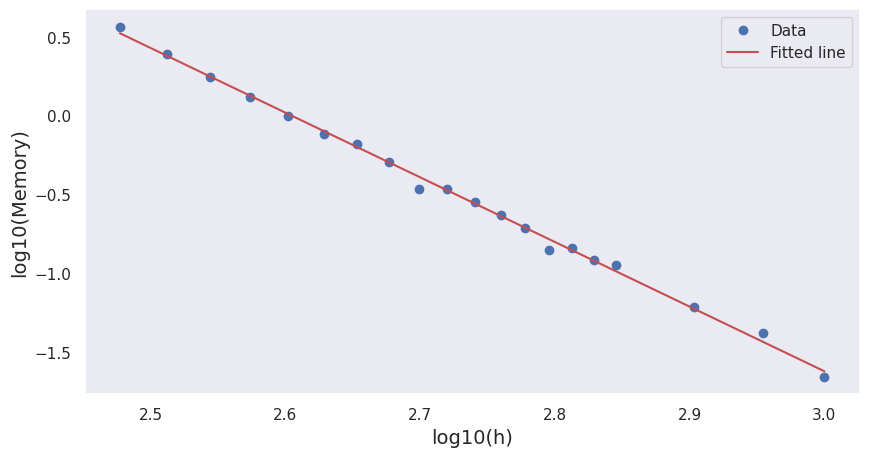

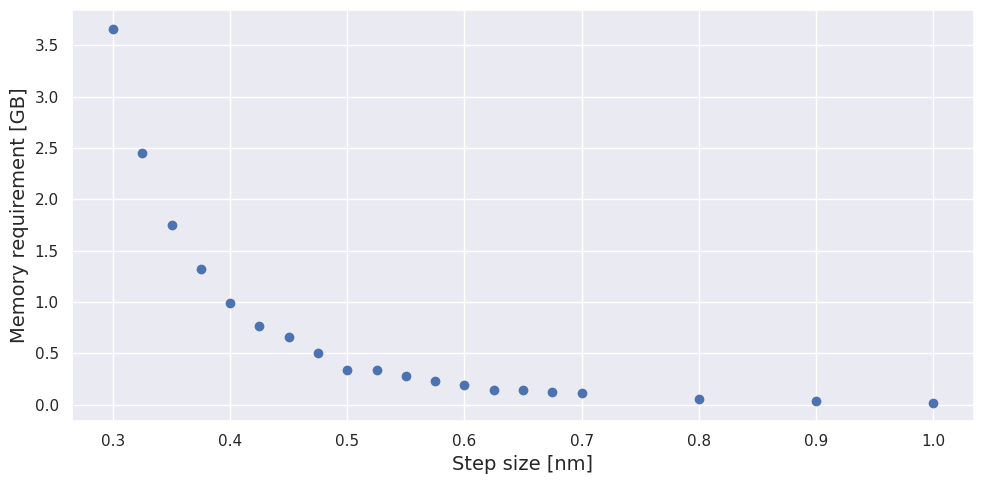

In [7]:
memory_data = []

for step in steps:
    memory_data.append(memory[step])

# Logarithmic analysis
log_steps = np.array([np.log10(s) for s in steps])
log_mem = np.array([np.log10(m) for m in memory_data])
slope, intercept = np.polyfit(log_steps, log_mem, 1)
print(slope,intercept)

# Logarithmic analysis
fig = plt.figure(figsize=(10, 5))
plt.plot(log_steps, log_mem, 'o', label='Data')
plt.plot(log_steps, slope*log_steps + intercept, 'r', label='Fitted line')
plt.xlabel('log10(h)', fontsize=14)
plt.ylabel('log10(Memory)', fontsize=14)
plt.grid()
plt.legend()
plt.show()

# Plotting
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter([s/1000 for s in steps], memory_data, marker='o')
ax.set_xlabel('Step size [nm]', fontsize=14)
ax.set_ylabel('Memory requirement [GB]', fontsize=14)
fig.set_tight_layout(tight=True)